# Relationship Exploration - Women in Headlines Dataset
## Maddie Knappenberger, Takira Boltman, Kate Campbell

This is the Relationship Exploration Notebook. This is where the majority of our Exploratory Analysis lives, after the pre-processing and cleanup has finished. Since we are dealing with headlines regarding women in some way, and have a bias score attached to that headline, we thought it would be interesting to dive into the bias a bit more and see what we can pull from that. We decided to use Vader Sentiment Analysis to find another metric in regards to the actual headline to find some useful information there for us to grab relationships from.

## Important Metrics to Note:
**Bias Score**: Bias score is provided to us from the original authors of the dataset. Bias score is measured for each individual headline using Gender Bias Taxonomy 1.0. More info on this can be found here: https://aclanthology.org/W19-3802.pdf



**Polarity Score**: Polarity Scores are calculated using Vader, that measures how "positive" or "negative" a sentence is on a scale of -4 to 4, with -4 being the most negative and 4 being the most positive. 0 means that the sentence had neutral sentiment.

##Importing and Setting up Polarity Scores

We'll be importing everything we need for this analysis - pandas, obviously, as well as matplot and seaborn graphing libraries, and of course importing nltk to then retrieve Vader from that.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mp

# Important Vader to perform sentiment analysis
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Since we already have some pre-processing done and exported into a seperate CSV file, we are going to just read in that URL from the Google Drive to save time.

In [ ]:
# I had to do this weird way of importing the csv file into the dataset, but should work for everyone (I had to change the permissiosn for the link)
url = 'https://drive.google.com/file/d/1Ec8u5DV-EMShOdHe5_oOIm4Qg4t027Kb/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

We're going to be exploring relationships by looking at different headlines and their polarity scores, so we are going to create a Sentiment Analysis object to perform our work with.
We are going to use a function that takes in a sentence as input, and then calls polarity_scores on the sentence to give us a compounded polarity score of negative, neutral and positive rather than having three seperate scores attached.

Then, we iterate through the Headlines column of the DataFrame using lambda and apply get_polarity function to every headline, and placing that score into a new column, titled Polarity.

In [ ]:
vader = SentimentIntensityAnalyzer()

# Define polarity function that returns the compounded polarity score
def get_polarity(sentence):
  return vader.polarity_scores(sentence)["compound"]

# Loop through every row in headline and apply get_polarity, storing it in new column 'Polarity'
df['Polarity'] = df['headline'].apply(lambda x: get_polarity(x))

This is now our DF with the polarity scores attached to each headline. Right off the bat, you can see some very obvious Polarity scores.. "Rand Air committed to excellence in safety..." has a Polarity score of 0.8402, probably due to the words "excellence" and "safety" in the headline, which have a generally positive connotation attached to them. Then, we see the headline "Shock as woman accussed of killing teen girlfriend..." has a Polarity score of -0.7184, which you can probably guess why this has a low score. 

In [ ]:
df

,date,time,headline,site,country,bias,Polarity
0,2018-02-23,08:00,'Lady Bird' buzzes through young sexuality,iol,South Africa,0.00,0.0000
1,2018-01-10,08:00,The shadowy urban POP super Starrah who loves ...,iol,South Africa,0.17,0.8225
2,2018-02-21,08:00,Rihanna pens heartfelt tribute to her mom in b...,iol,South Africa,0.33,0.5423
3,2018-02-27,08:00,Shock as woman accused of killing teen girlfri...,iol,South Africa,0.33,-0.7184
4,2018-02-15,08:00,TOP STORY: Meet South Africa's new first lady ...,iol,South Africa,0.17,0.3680
...,...,...,...,...,...,...,...
382134,2021-03-31,07:00,Siri Will No Longer Default to a Female Voice ...,makeuseof,UK,0.17,-0.2960
382135,2021-03-05,08:00,The impact of COVID 19 on women,cbn,South Africa,0.17,0.0000
382136,2021-04-14,07:00,Rand Air committed to excellence in safety wit...,cbn,South Africa,0.17,0.8402
382137,2021-03-10,08:00,Mother City's 'Lanseria': New airport in the p...,cbn,South Africa,0.17,0.0000


We wanted to get just a general sense of the Polarity scores between all the countries. We already had a feeling that we had too many rows and needed to drop some, but we weren't sure how to proceed. This graph more or less confirmed it. Not only are there just so many values on this graph and it's quite hard to see, but South Africa is severely lacking in data compared to the other 3 countries. This wouldn't bring down our row count by much if we entirely excluded South Africa though.

Text(0.5, 0.98, 'Polarity Score Counts by Country')

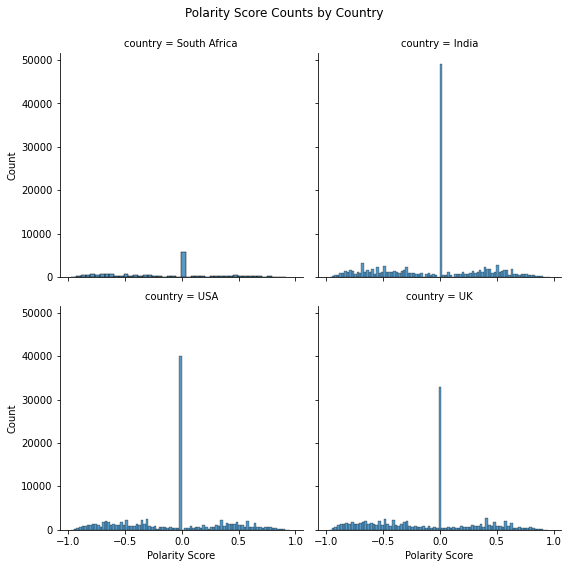

In [ ]:
# Graphing Polarity and Bias scores by country
g = sns.FacetGrid(df, col='country', col_wrap=2, height=4)
g.map(sns.histplot, 'Polarity')

plt.subplots_adjust(top=0.90)
g.set_axis_labels('Polarity Score', 'Count')
g.fig.suptitle("Polarity Score Counts by Country")

Since there are so many rows to this DataFrame, there has to be a way to narrow this down in a way without losing a lot of data. As you can see, there are quite a bit of different websites, but the bulk of the websites used are near the top of the list. Websites like dailysun, pcadvisor, howtogeek, etc. only offer a few pieces of information.

There are only a few unique values for the bias scores, so there's no need to try to cut those down into more manageable chunks, they are already manageable.

In [ ]:
# Checking different websites
df['site'].value_counts()

df['bias'].value_counts()

0.17    265271
0.00     57227
0.33     52629
0.50      6408
0.67       568
0.83        35
1.00         1
Name: bias, dtype: int64

Next, we check the countries we are working with. We have a few options, but opted out from doing large comparisons with South Africa, as the number of unique datapoints is quite low compared to the other three. Since we thought that there could be some really interesting information between USA and India, we wanted to visit this. USA and India have some pretty differing views on a woman's role in society and felt like there must be something there for us to use.

In [ ]:
# Checking countries - Decided on looking further into India and USA due to the difference in culture in regards to women, and have comparable 
df['country'].value_counts()

India           138590
USA             115669
UK              109286
South Africa     18594
Name: country, dtype: int64

Since there are so many different websites, we wanted to look at the top 10 websites for both USA and India. We did some further research on the most commonly used websites for news in both India and US, and felt like most of the websites matched up with the sites we are seeing here. This makes our data a little less crowded, while (hopefully) getting similar results.

In [ ]:
#Top 10 India websites 
#dailymail, indiatimes, nytimes, dnaindia, forbes, businessinsider, theguardian, economictimes, ndtv, indianexpress
df.loc[df['country'] == 'India', 'site'].value_counts().head(10)

#Top 10 USA websites 
#abcnews, nydailynews, eonline, usmagazine, usatoday, people, nypost, npr, cbsnews, nbcnews
df.loc[df['country'] == 'USA', 'site'].value_counts().head(10)

abcnews        6305
nydailynews    5929
eonline        5826
usmagazine     5582
usatoday       5239
people         5125
nypost         5044
npr            4904
cbsnews        4668
nbcnews        4497
Name: site, dtype: int64

## Further Analysis into USA and India

Here, we are going to make a new DF that contains only USA and India.

Then, we make another DF that is going to contain only the top 10 websites for both USA and India.

In [ ]:
new_df = df[df['country'].isin(['India', 'USA'])].copy()

clean_df = new_df[new_df['site'].isin(['abcnews', 'nydailynews', 'eonline', 'usmagazine', 'usatoday', 'people', 'nypost', 'npr', 'cbsnews', 'nbcnews',
                                    'dailymail', 'indiatimes', 'nytimes', 'dnaindia', 'forbes', 'businessinsider', 'theguardian', 'economictimes', 'ndtv', 'indianexpress'])].copy()

CSV export if needed by other group members of the cleaned up, dwindled down version of our original DF that only contains US and India with the top 20 websites.

In [ ]:
#clean_df.to_csv('IndiaUS.csv')

We seperate the DF into two, one for USA and one for India so we can do some processing on both. We figured we wanted to do two plots instead of one individual one, as sizing of graphs may make some data lost in the final product.

We make two lists, both containing the unique values of the "site" column, and calculate an overall mean of the Polarity score and the overall mean of the Bias score (given by the dataset) for each website, and replacing the value in those columns with our new calculated values. This seemed like the easiest way to compare Sentiment Analysis and Bias between India and USA based on site, as both have unique values for websites than the other.

In [ ]:
#creating the DFS from the filtered sites DF
india_clean = clean_df[clean_df['country'].isin(['India'])].copy()
us_clean = clean_df[clean_df['country'].isin(['USA'])].copy()

#Creating lists of unique site values from each country
unique_values_india = india_clean['site'].unique()
unique_values_US = us_clean['site'].unique()

#average polarity score for india
for value in unique_values_india:
    avg = india_clean.loc[india_clean['site'] == value, 'Polarity'].mean()
    india_clean.loc[india_clean['site'] == value, 'Polarity'] = avg

#average polarity score for US
for value in unique_values_US:
    avg = us_clean.loc[us_clean['site'] == value, 'Polarity'].mean()
    us_clean.loc[us_clean['site'] == value, 'Polarity'] = avg

#average bias score for india
for value in unique_values_india:
    avg = india_clean.loc[india_clean['site'] == value, 'bias'].mean()
    india_clean.loc[india_clean['site'] == value, 'bias'] = avg

#average bias score for india
for value in unique_values_US:
    avg = us_clean.loc[us_clean['site'] == value, 'bias'].mean()
    us_clean.loc[us_clean['site'] == value, 'bias'] = avg

In [ ]:
us_clean

,date,time,headline,site,country,bias,Polarity
9207,2016-02-03,08:00,Mother and Daughter Reunite After 82 Years,abcnews,USA,0.183672,-0.137745
9208,2016-01-19,08:00,Hayden Panettiere 'Happy' to Stand Up for Wome...,abcnews,USA,0.183672,-0.137745
9209,2016-02-27,08:00,Woman Gets Trendy Tattoo to 'Caution' People S...,abcnews,USA,0.183672,-0.137745
9210,2016-02-03,08:00,Timeline of Alleged Abduction and Slaying of 1...,abcnews,USA,0.183672,-0.137745
9211,2016-02-10,08:00,"Unabomber Ted Kaczynski's Brother, Sister in L...",abcnews,USA,0.183672,-0.137745
...,...,...,...,...,...,...,...
354181,2021-05-05,07:00,Danielle Fishel Announces Her and Jensen Karp’...,usmagazine,USA,0.180597,0.065991
354182,2021-05-04,07:00,Pink Rewrote Her Will During ‘Scary’​​​​ COVID...,usmagazine,USA,0.180597,0.065991
354183,2021-05-04,07:00,Joe Jonas Gushes Over His ‘Gorgeous’ Baby Girl...,usmagazine,USA,0.180597,0.065991
354184,2021-05-04,07:00,Chelsea Houska Left ‘Teen Mom 2’ for Daughter ...,usmagazine,USA,0.180597,0.065991


Since we have some pretty whacky numbers from our calculations, we're going to round all of our average Polarity and Bias scores to the nearest hundredth place. We decided not to round to the nearest tenth as we felt like we would lose some necessary data.

In [ ]:
# Rounding avg bias numbers to the nearest hundredth
india_clean['bias'] = india_clean['bias'].apply(lambda x: round(x, 2))
us_clean['bias'] = us_clean['bias'].apply(lambda x: round(x, 2))

# Rounding avg Polarity numbers to the nearest hundredth
india_clean['Polarity'] = india_clean['Polarity'].apply(lambda x: round(x, 2))
us_clean['Polarity'] = us_clean['Polarity'].apply(lambda x: round(x, 2))

In [ ]:
india_clean

,date,time,headline,site,country,bias,Polarity
14646,2018-02-10,08:00,30 perfect Valentine's Day gifts every woman w...,businessinsider,India,0.17,-0.03
14647,2018-01-03,08:00,Iceland Has Made It Illegal to Pay Women Less ...,businessinsider,India,0.17,-0.03
14648,2018-01-23,08:00,The 10 safest countries in the world for women,businessinsider,India,0.17,-0.03
14649,2018-01-01,08:00,300 top Hollywood women reveal sweeping anti h...,businessinsider,India,0.17,-0.03
14650,2018-01-31,08:00,Men get an 'attractiveness boost' when other w...,businessinsider,India,0.17,-0.03
...,...,...,...,...,...,...,...
345414,2021-05-18,07:00,My 10 month stay at a treatment center for bor...,theguardian,India,0.15,-0.08
345415,2021-05-26,04:46,‘Why shouldn’t she stand up?’ Liz Cambage gets...,theguardian,India,0.15,-0.08
345416,2021-05-22,07:00,My mum escaped the cruelty of Ireland’s mother...,theguardian,India,0.15,-0.08
345417,2021-05-24,07:00,‘What chance did Mum have?’: two women who die...,theguardian,India,0.15,-0.08


Here we clean up the website names for pre-processing and graphing purposes.

In [ ]:
india_clean['site'] = india_clean['site'].replace({'dailymail': 'Daily Mail', 'indiatimes': 'India Times', 'nytimes': 'NY Times', 'dnaindia': 'DNA India', 'forbes': 'Forbes', 'businessinsider': 'Business Insider',
                                                   'theguardian': 'The Guardian', 'economictimes': 'Economic Times', 'ndtv': 'NDTV', 'indianexpress': 'Indian Express'})
us_clean['site'] = us_clean['site'].replace({'abcnews': 'ABC News', 'nydailynews': 'NY Daily News', 'eonline': 'E! Online', 'usmagazine': 'US Magazine', 'usatoday': 'USA Today', 'people': 'People',
                                                   'nypost': 'NY Post', 'npr': 'NPR', 'cbsnews': 'CBS News', 'nbcnews': 'NBC News'})

## Comparing Bias and Polarity Scores Between USA and India from Popular News Sites

We're going to be splitting up USA and India graphs into two seperate graphs, so we will set up the barplot for our India graph.

First, we are setting a general theme for Seaborn to make our graphs look since, while also fixing the image quality of our graphics and setting a general figure size. Then we get into the visualizations.

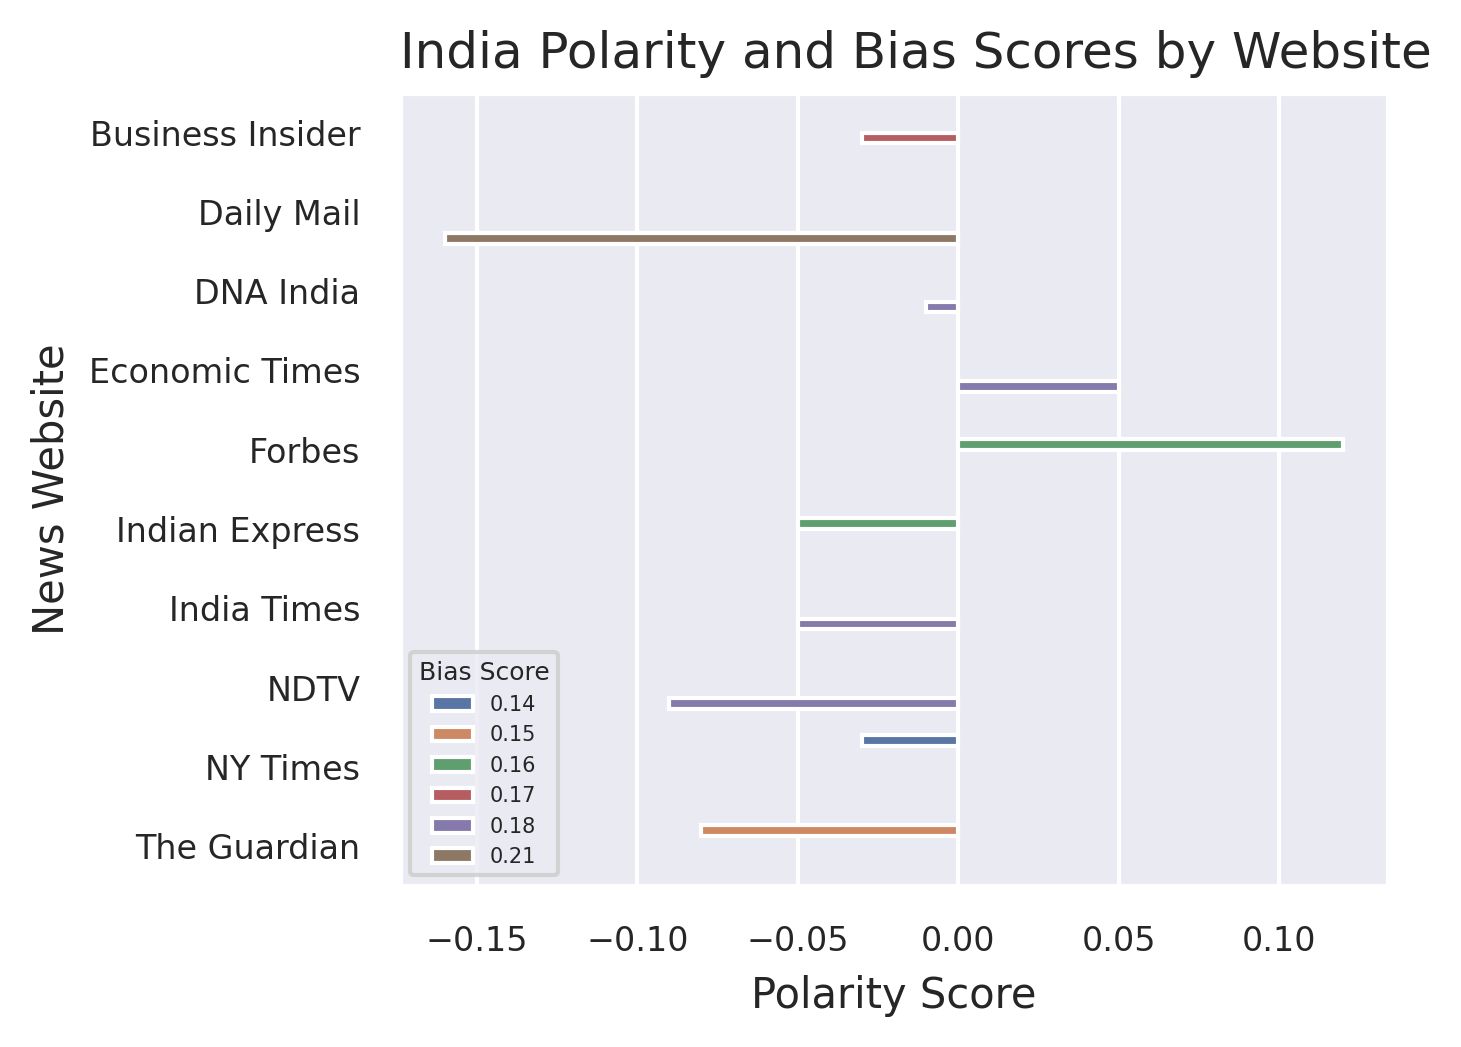

In [ ]:
# For the image quality of the graphic. 
sns.set(rc={"figure.dpi":300})
sns.set_theme()

sns.barplot(data=india_clean, x='Polarity', y='site', hue='bias')
# set the font size of the x and y tick labels
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

mp.rcParams['legend.fontsize'] = 5
leg = plt.legend()
leg.set_title('Bias Score', prop={'size': 6})

plt.title("India Polarity and Bias Scores by Website", fontsize=12, loc="left")
plt.xlabel("Polarity Score", fontsize=10)
plt.ylabel("News Website", fontsize=10)

# plot size
plt.gcf().set_size_inches(4.25,3.5)

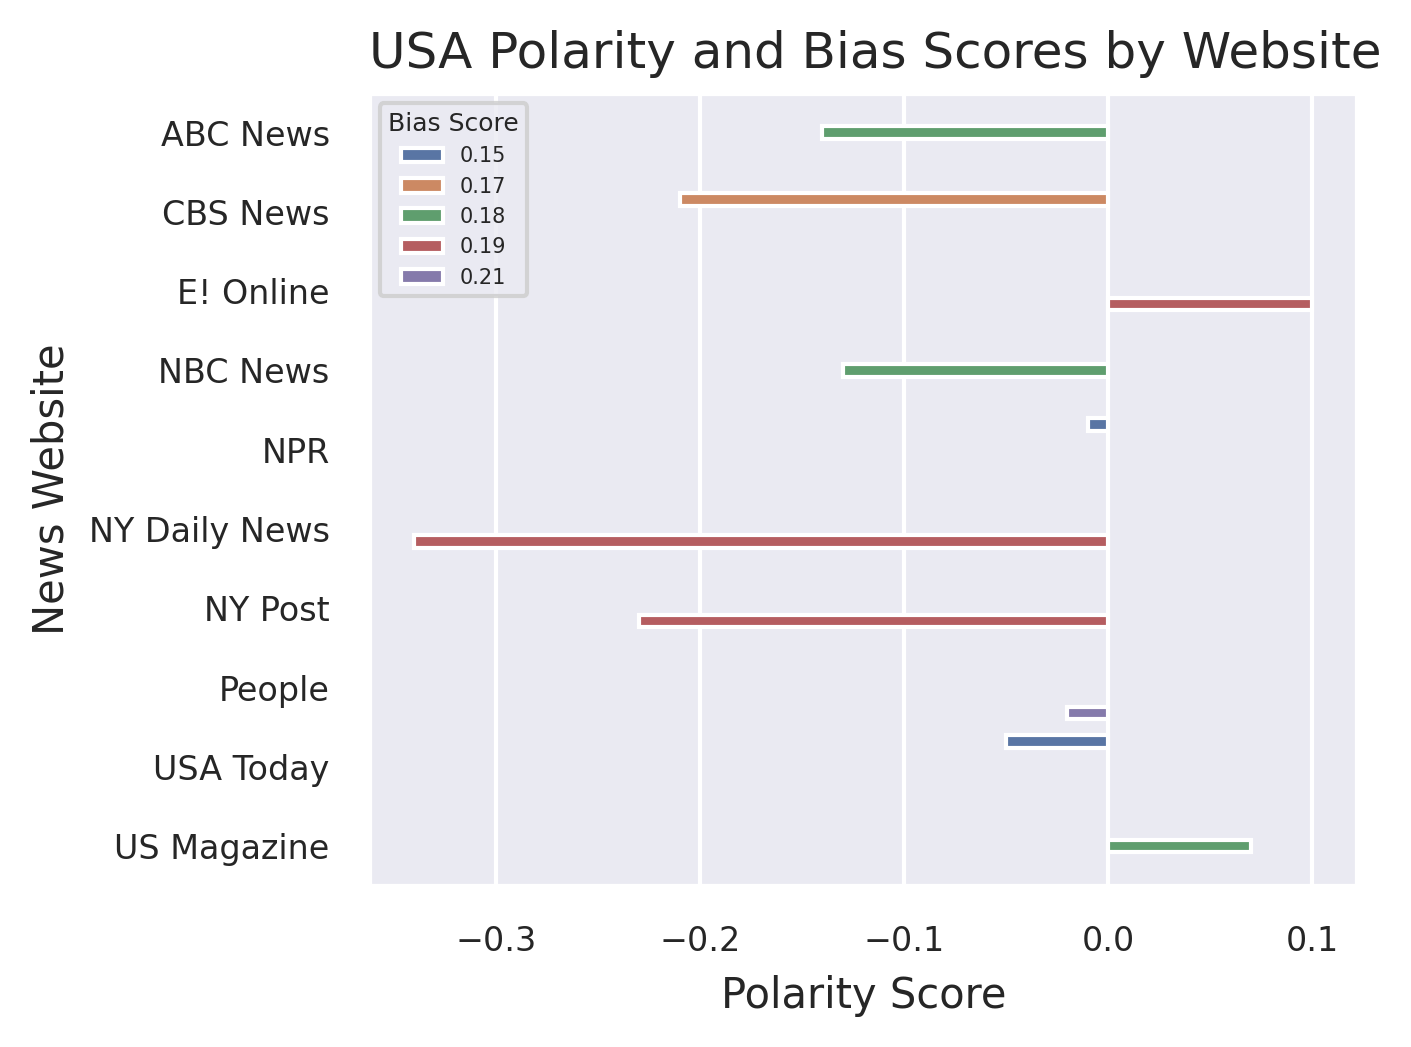

In [ ]:
sns.barplot(data=us_clean, x='Polarity', y='site', hue='bias')
# set the font size of the x and y tick labels
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

mp.rcParams['legend.fontsize'] = 5
leg = plt.legend()
leg.set_title('Bias Score', prop={'size': 6})

plt.title("USA Polarity and Bias Scores by Website", fontsize=12, loc="left")
plt.xlabel("Polarity Score", fontsize=10)
plt.ylabel("News Website", fontsize=10)

# plot size
plt.gcf().set_size_inches(4.25,3.5)

# Finding Relationship Between Polarity and Bias Scores

We want to do a bit more deep diving into finding some relationships. Since there is so much data and so much over a period of time, we thought we would resample some data based on time to kind of narrow things down a bit more. So we make a DF for USA, and we set the index to the date and turn it into a DateTime object. Then, we make two Dataframes that resample the Polarity and Bias scores by Month and then merge those two together, since they share the same index values. We dropped some NaN values, and below is the merged DF with our average scores per month.

In [ ]:
ustest = clean_df[clean_df['country'].isin(['USA'])].copy()
ustest.set_index('date', inplace=True)
ustest.index = pd.to_datetime(ustest.index)
us_month_polar = ustest['Polarity'].resample('M').mean()
us_month_bias = ustest['bias'].resample('M').mean()
us_month_df_polarity = us_month_polar.to_frame(name='Average Polarity Score')
us_month_df_bias = us_month_bias.to_frame(name='Average Bias Score')

us_month_df = us_month_df_polarity.merge(us_month_df_bias, left_index=True, right_index=True)
us_month_df.dropna(inplace=True)
us_month_df

,Average Polarity Score,Average Bias Score
date,,
2005-03-31,-0.648600,0.170000
2005-05-31,0.000000,0.170000
2005-07-31,0.000000,0.170000
2005-08-31,-0.542300,0.170000
2005-10-31,-0.220200,0.085000
...,...,...
2021-02-28,-0.132212,0.177584
2021-03-31,-0.127825,0.182654
2021-04-30,-0.084884,0.184540


We do the same exact thing as above, except we perform the operations with India to isolate those average values by Month.

In [ ]:
indiatest = clean_df[clean_df['country'].isin(['India'])].copy()
indiatest.set_index('date', inplace=True)
indiatest.index = pd.to_datetime(indiatest.index)
india_month_polar = indiatest['Polarity'].resample('M').mean()
india_month_bias = indiatest['bias'].resample('M').mean()
india_month_df_polarity = india_month_polar.to_frame(name='Average Polarity Scores')
india_month_df_bias = india_month_bias.to_frame(name='Average Bias Scores')

india_month_df = india_month_df_polarity.merge(india_month_df_bias, left_index=True, right_index=True)
india_month_df.dropna(inplace=True)
india_month_df

,Average Polarity Scores,Average Bias Scores
date,,
2005-01-31,-0.106067,0.166667
2005-02-28,0.000000,0.000000
2005-03-31,-0.060200,0.113333
2005-04-30,-0.377675,0.170000
2005-05-31,-0.134000,0.140000
...,...,...
2021-02-28,-0.095981,0.175379
2021-03-31,0.080743,0.172518
2021-04-30,0.013470,0.180322


Text(0, 0.5, 'Polarity Score')

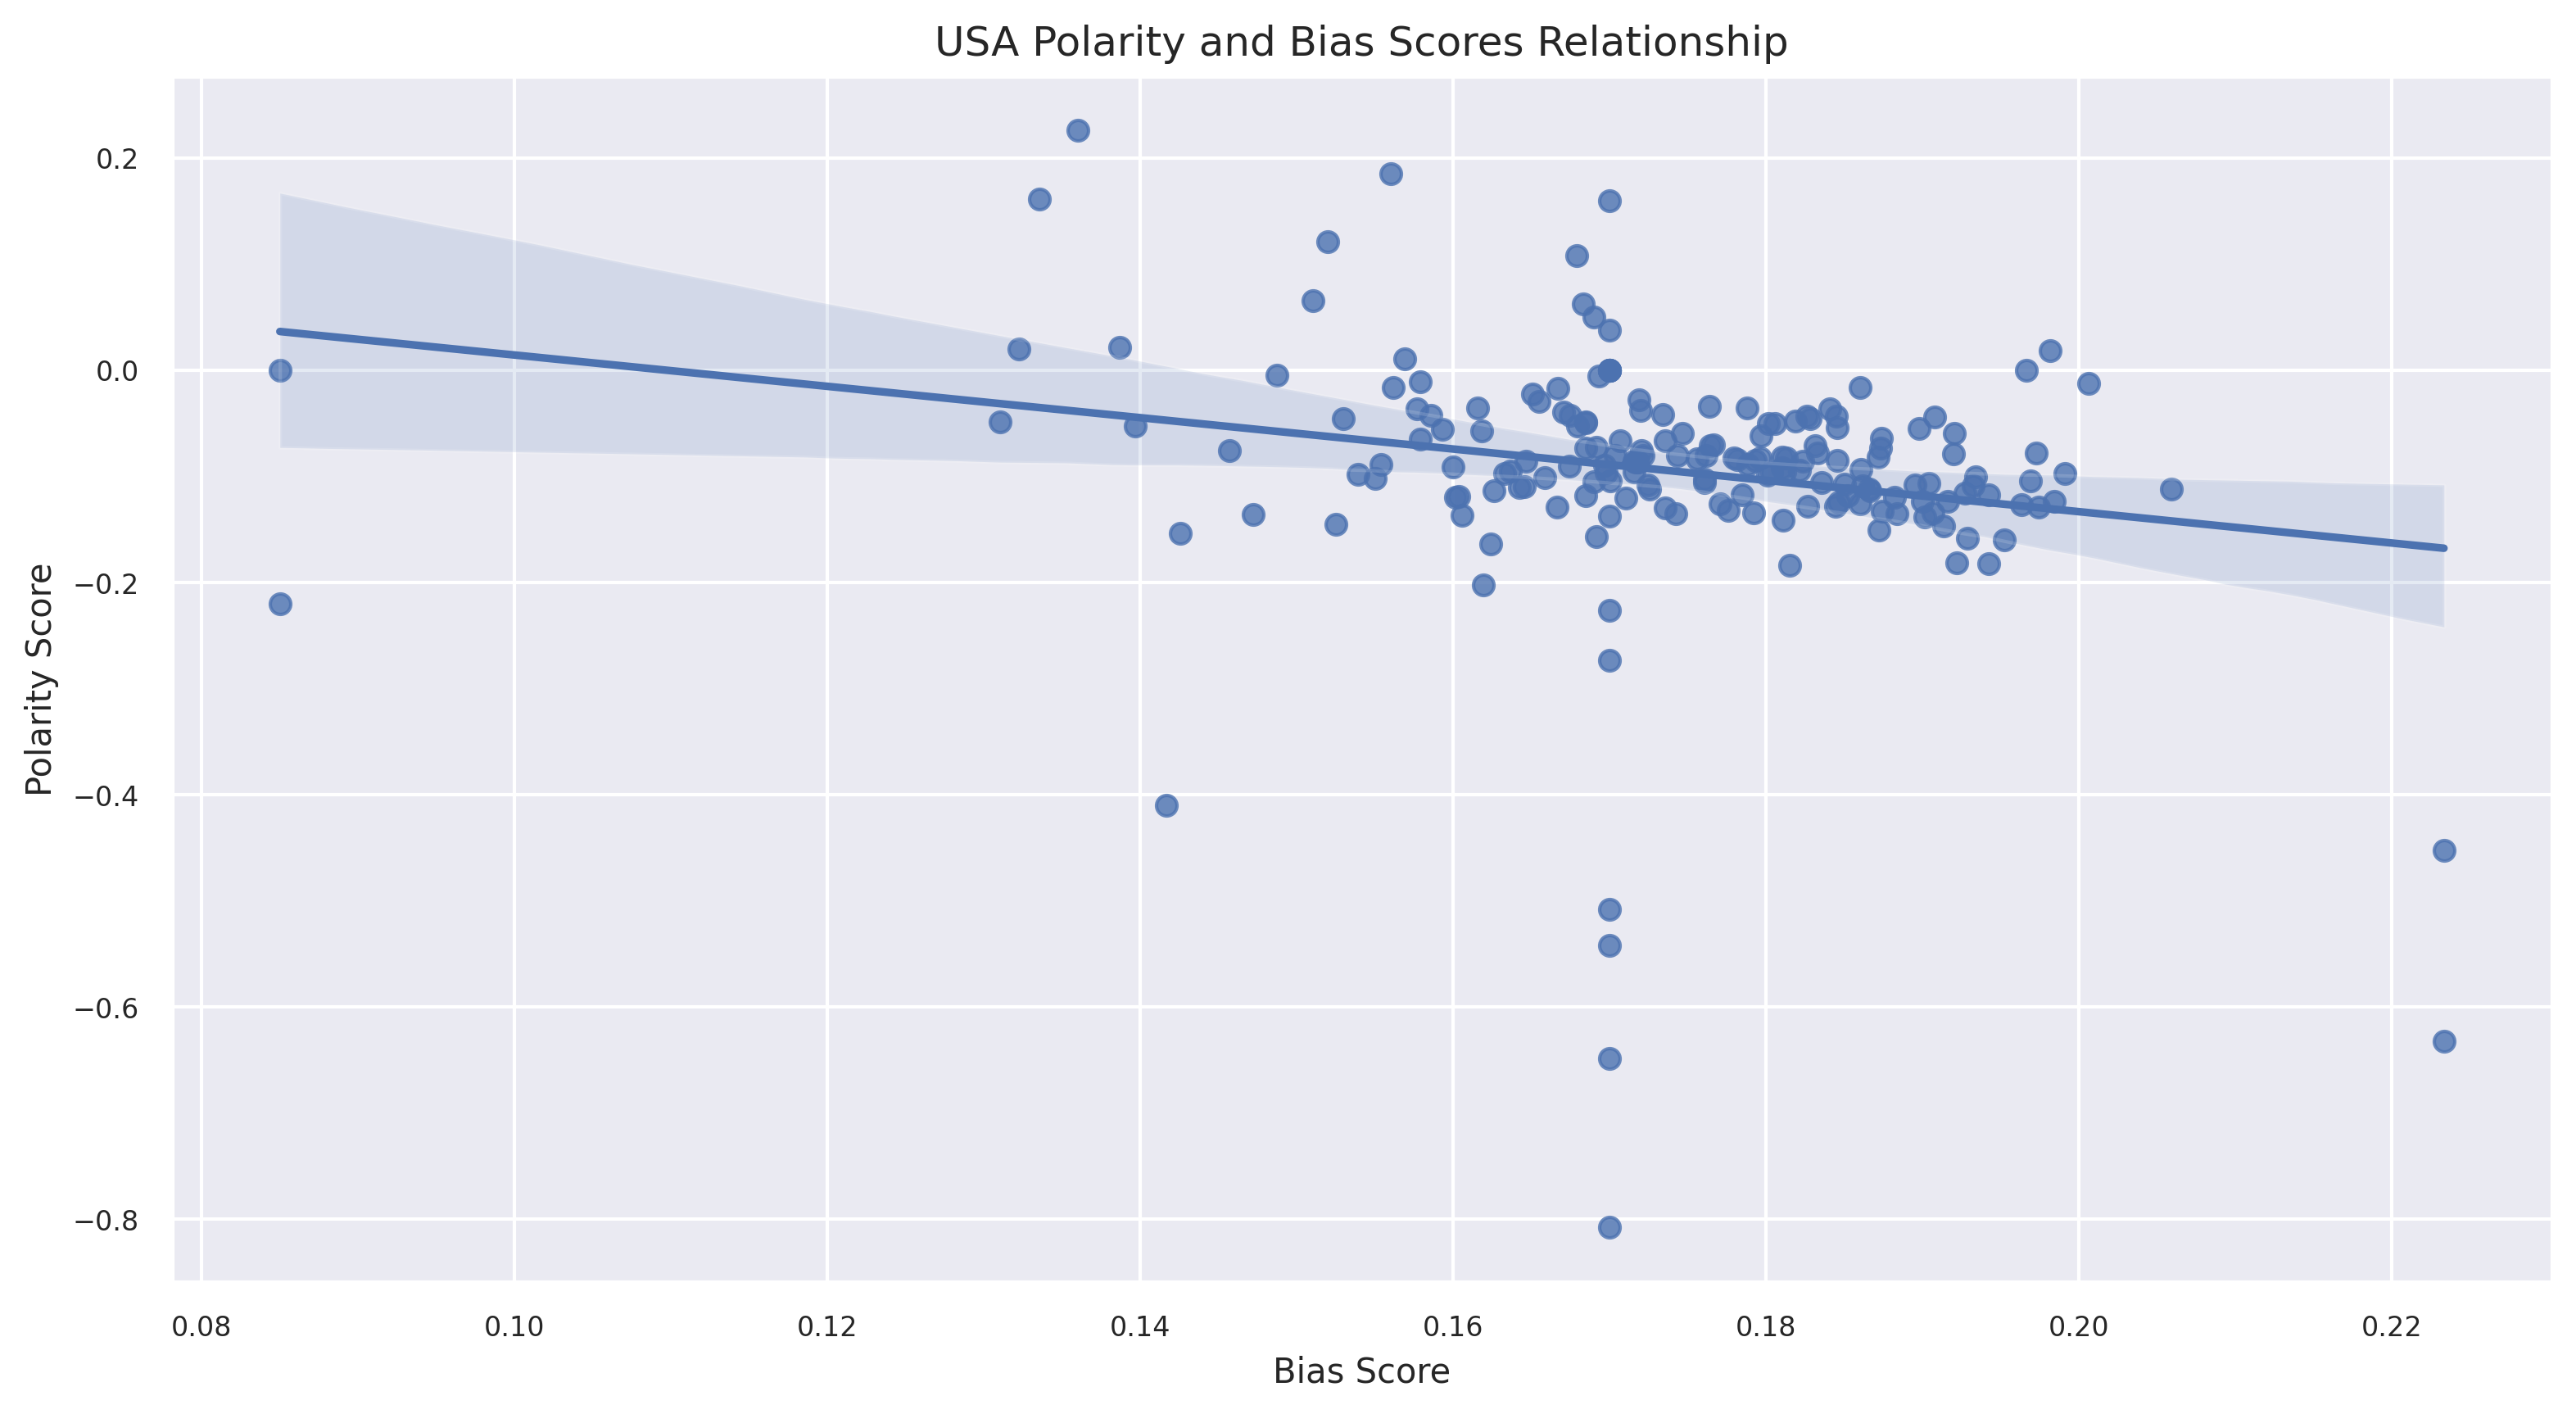

In [ ]:
sns.regplot(data=us_month_df, x='Average Bias Score', y='Average Polarity Score')
plt.gcf().set_size_inches(12.5,6.5)

# set the font size of the x and y tick labels
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.title("USA Polarity and Bias Scores Relationship", fontsize=12)
plt.xlabel("Bias Score", fontsize=10)
plt.ylabel("Polarity Score", fontsize=10)

Text(0, 0.5, 'Polarity Score')

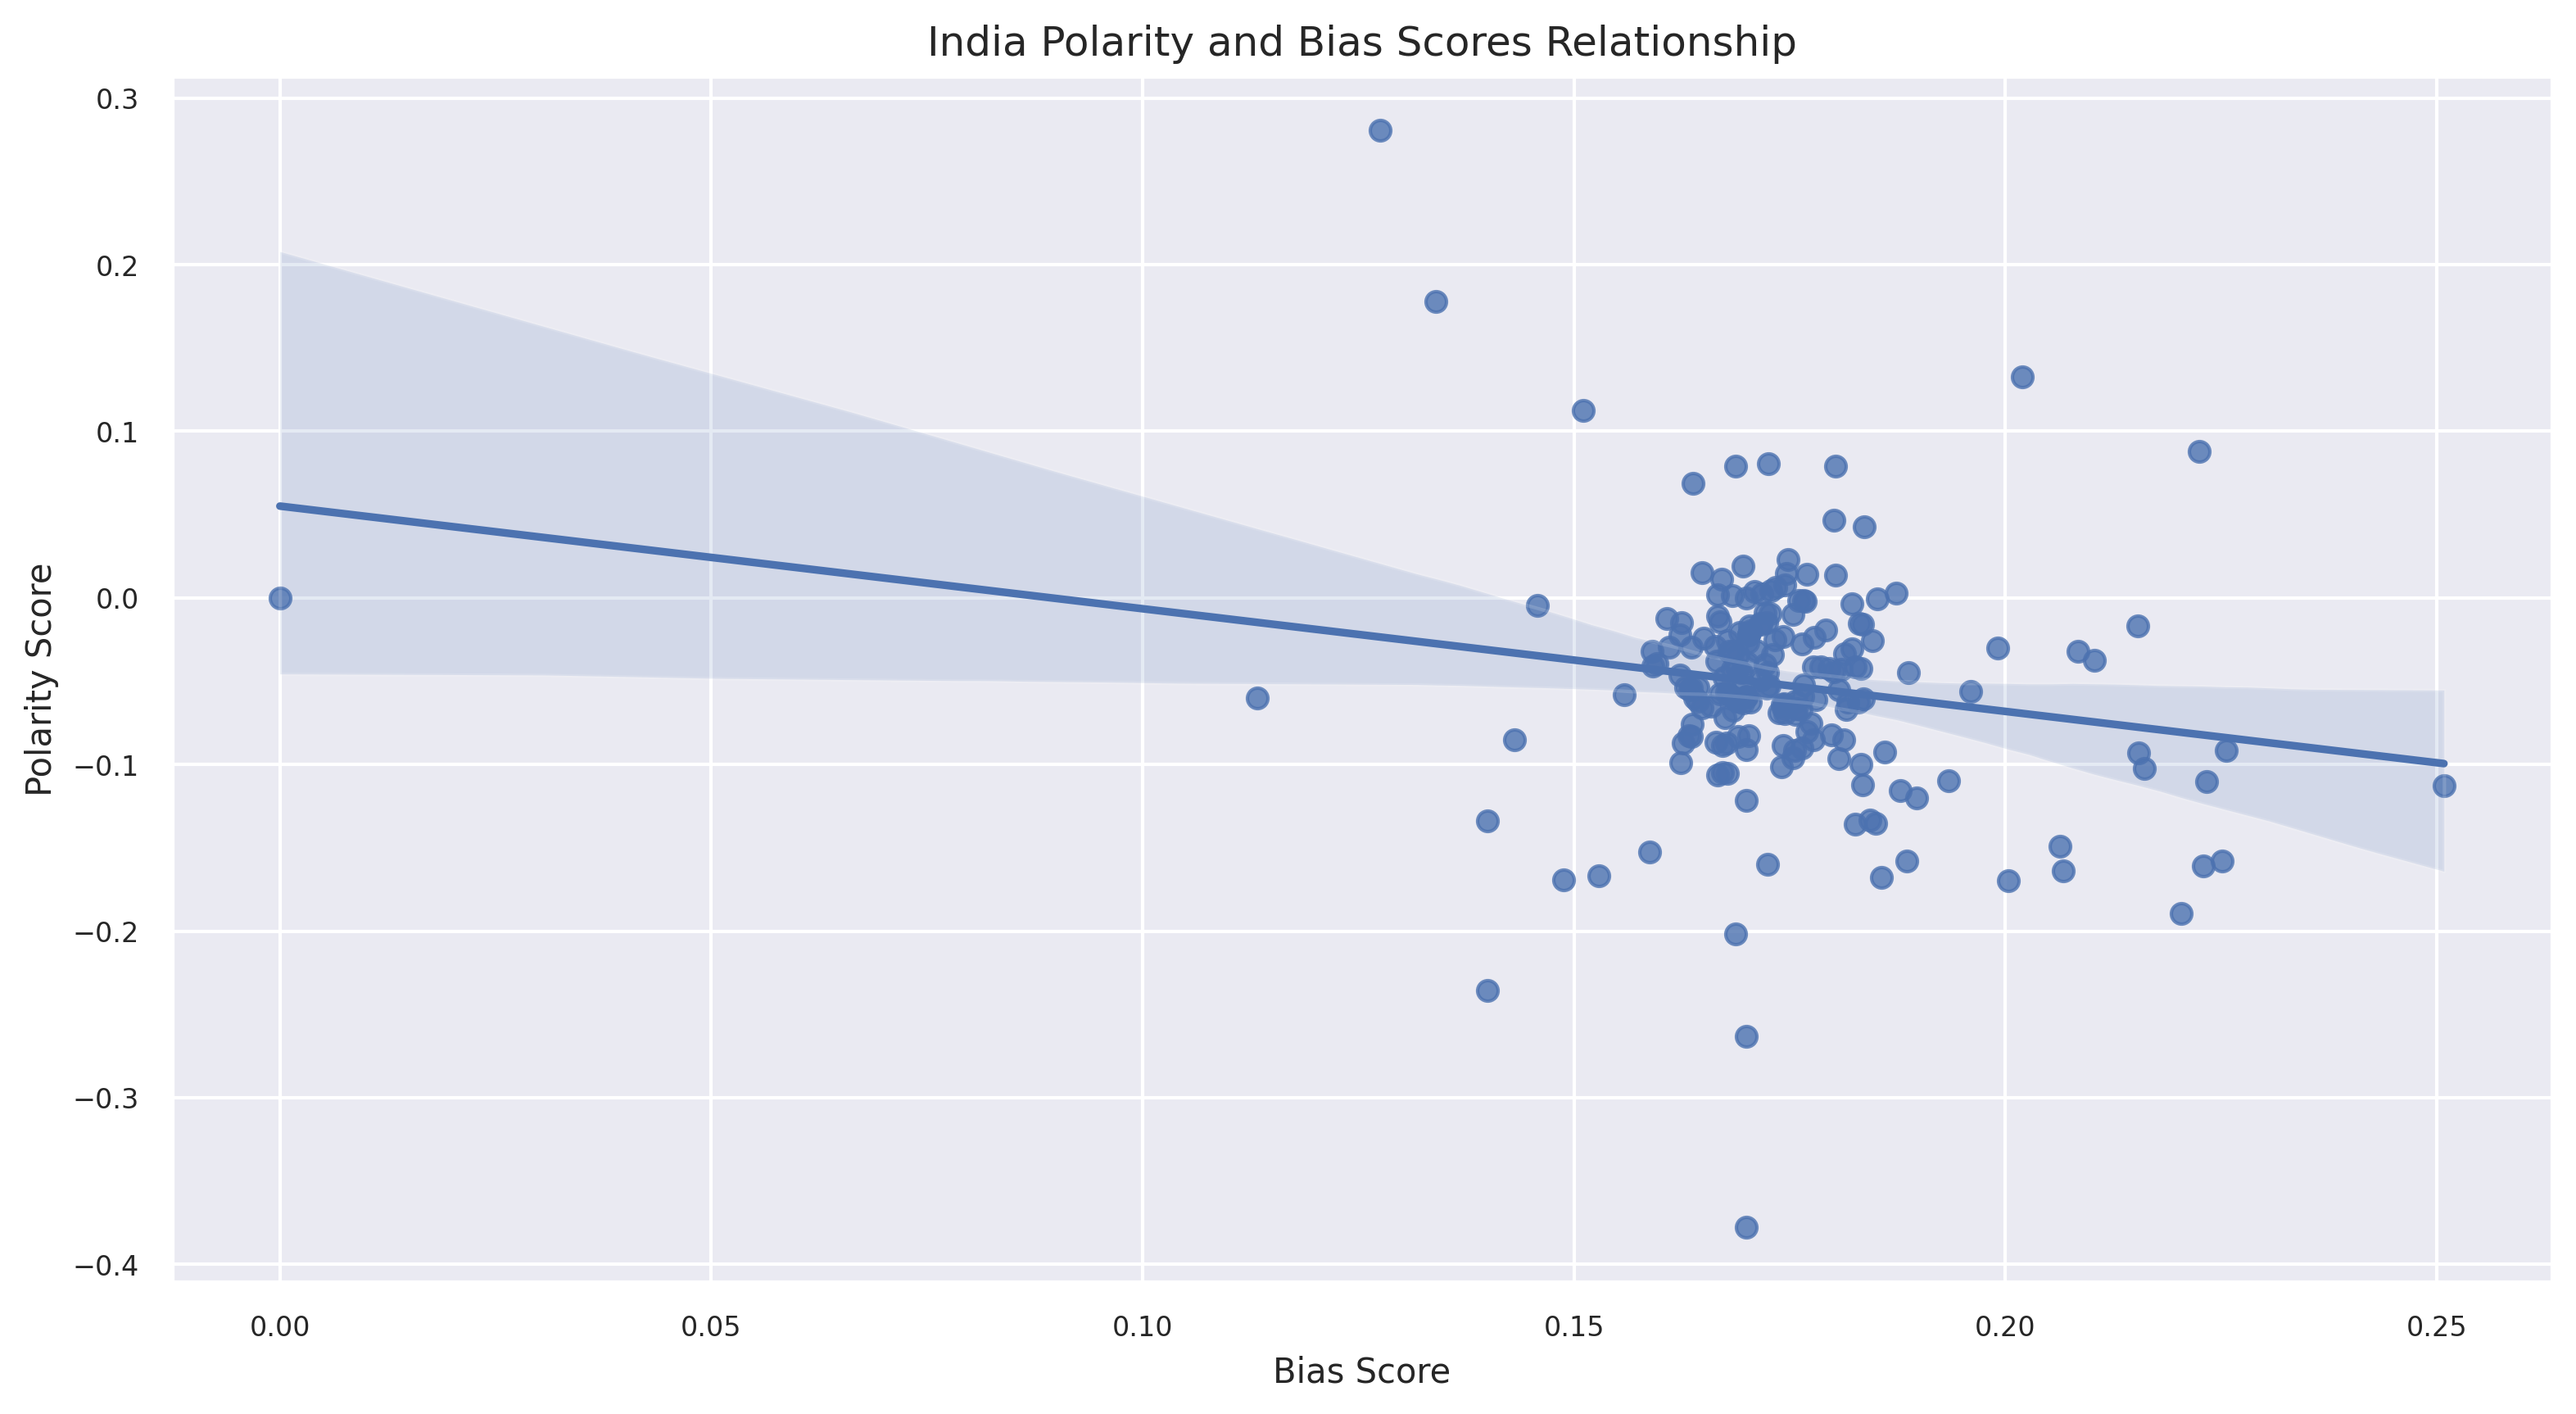

In [ ]:
sns.regplot(data=india_month_df, x='Average Bias Scores', y='Average Polarity Scores')
plt.gcf().set_size_inches(12.5,6.5)

# set the font size of the x and y tick labels
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.title("India Polarity and Bias Scores Relationship", fontsize=12)
plt.xlabel("Bias Score", fontsize=10)
plt.ylabel("Polarity Score", fontsize=10)

Surprising enough, the trend for USA and India is very similar, despite their cultural differences. Both show a trend of when the Polarity score decreases, the Bias score increases. Are we really surprised? I might be, a bit. In my research I was expecting India to have this trend, but not so much the USA. 

# Comparing Bias Scores by Month Over 5 Year Increments for India and USA

Since there is around 15 years of data within this dataset, even as broken down as we have it, there's a lot to work with here. In order to see the most out of this data, we thought we'd break this into periods of 5 years. We thought that with the growing trend of opinion pieces coming out in recent years that the Bias scores might be interesting to look at over a period of time. So, we are going to pull those specific years into a new Dataframe. I was having issues with splitting up the data based on year and month average, so I decided to just reset the index and pull the date out into a new column, convert it back to DateTime and then loop through that column. While looping, we create a DF to store only the year being looped on and then plot the month Bias scores on to the associated plot.

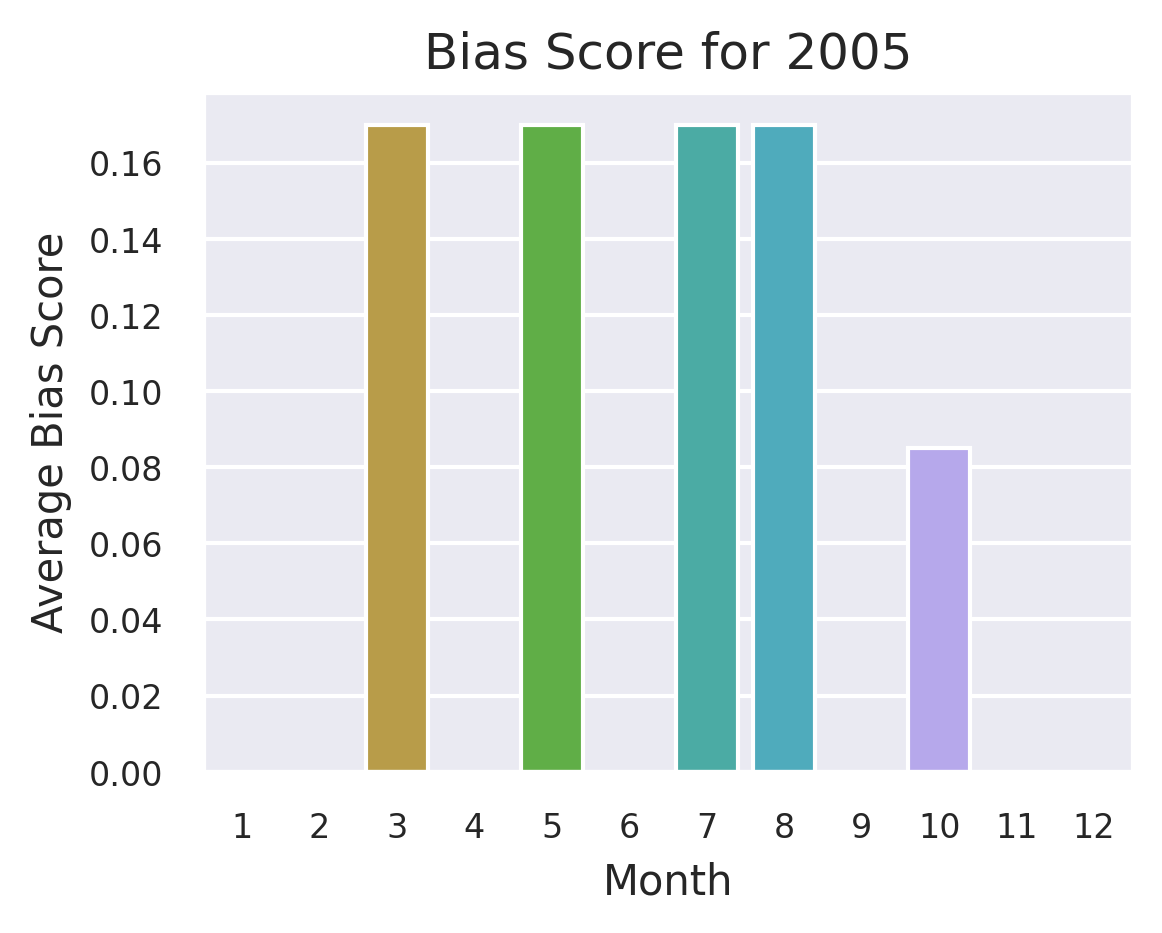

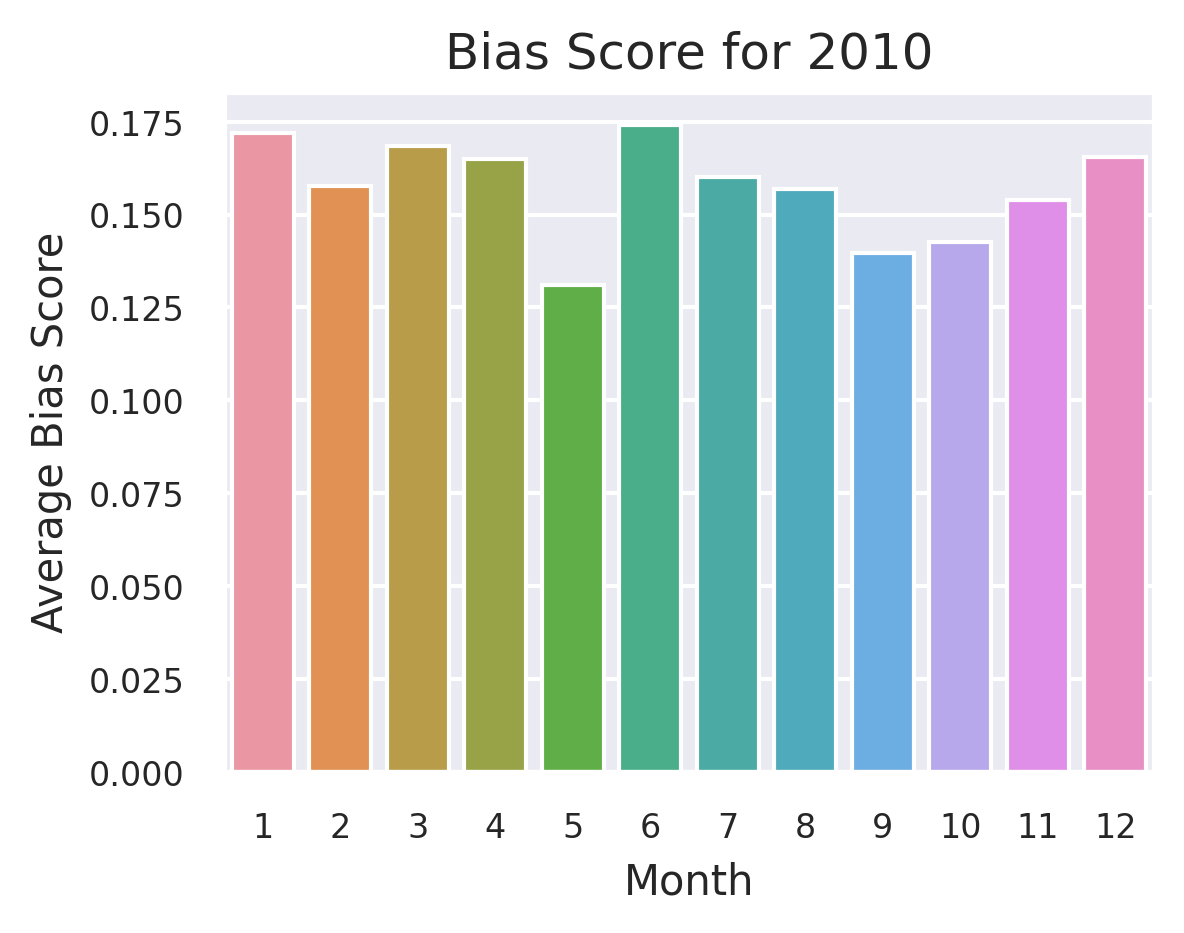

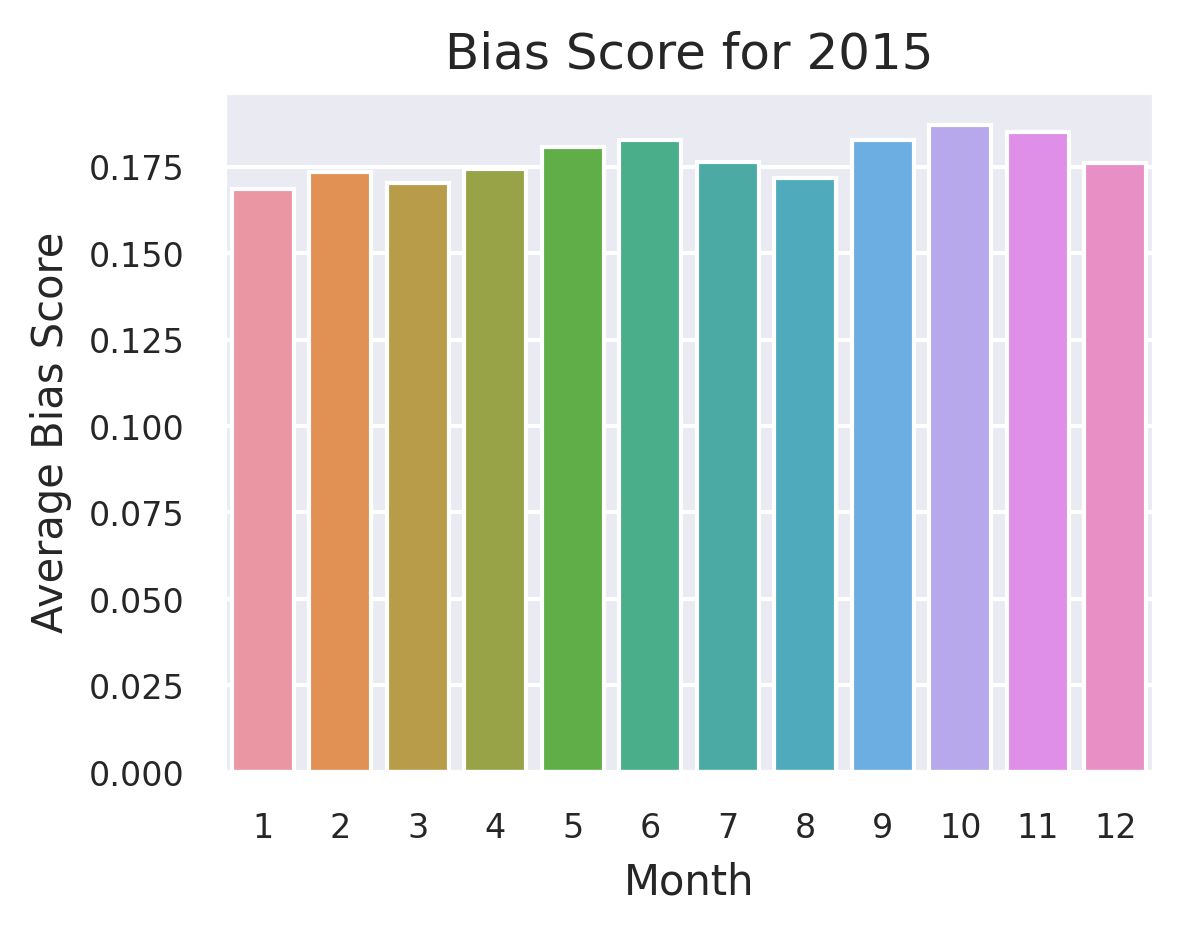

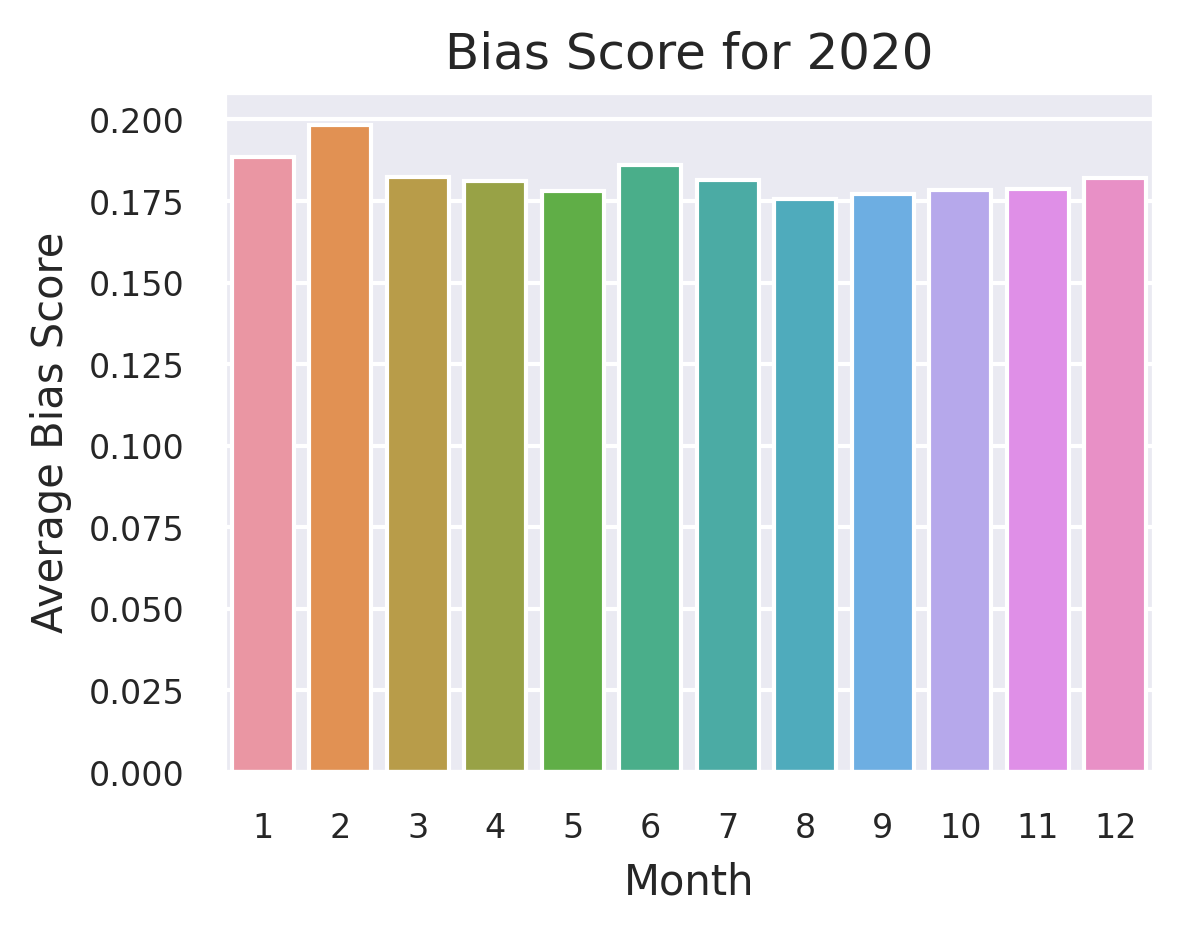

In [ ]:
year_subset_df = us_month_df[us_month_df.index.year.isin([2005, 2010, 2015, 2020])]
#year_subset_df.index = year_subset_df.index.strftime('%Y-%m')
year_subset_df = year_subset_df.reset_index()
year_subset_df['date'] = pd.to_datetime(year_subset_df['date'])

for year in year_subset_df['date'].dt.year.unique():
    plt.figure()
    year_df = year_subset_df[year_subset_df['date'].dt.year == year]
    ax = sns.barplot(data=year_df, x=year_subset_df['date'].dt.month, y='Average Bias Score')
    ax.set_title(f'Bias Score for {year}')
    ax.set_xlabel('Month', fontsize=10)
    ax.set_ylabel('Average Bias Score', fontsize=10)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    plt.gcf().set_size_inches(4,3)


plt.show()

<ipython-input-155-cf27aa22b26d>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  year_df2 = year_subset_df[year_subset_df2['date'].dt.year == year]
<ipython-input-155-cf27aa22b26d>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  year_df2 = year_subset_df[year_subset_df2['date'].dt.year == year]
<ipython-input-155-cf27aa22b26d>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  year_df2 = year_subset_df[year_subset_df2['date'].dt.year == year]
<ipython-input-155-cf27aa22b26d>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  year_df2 = year_subset_df[year_subset_df2['date'].dt.year == year]


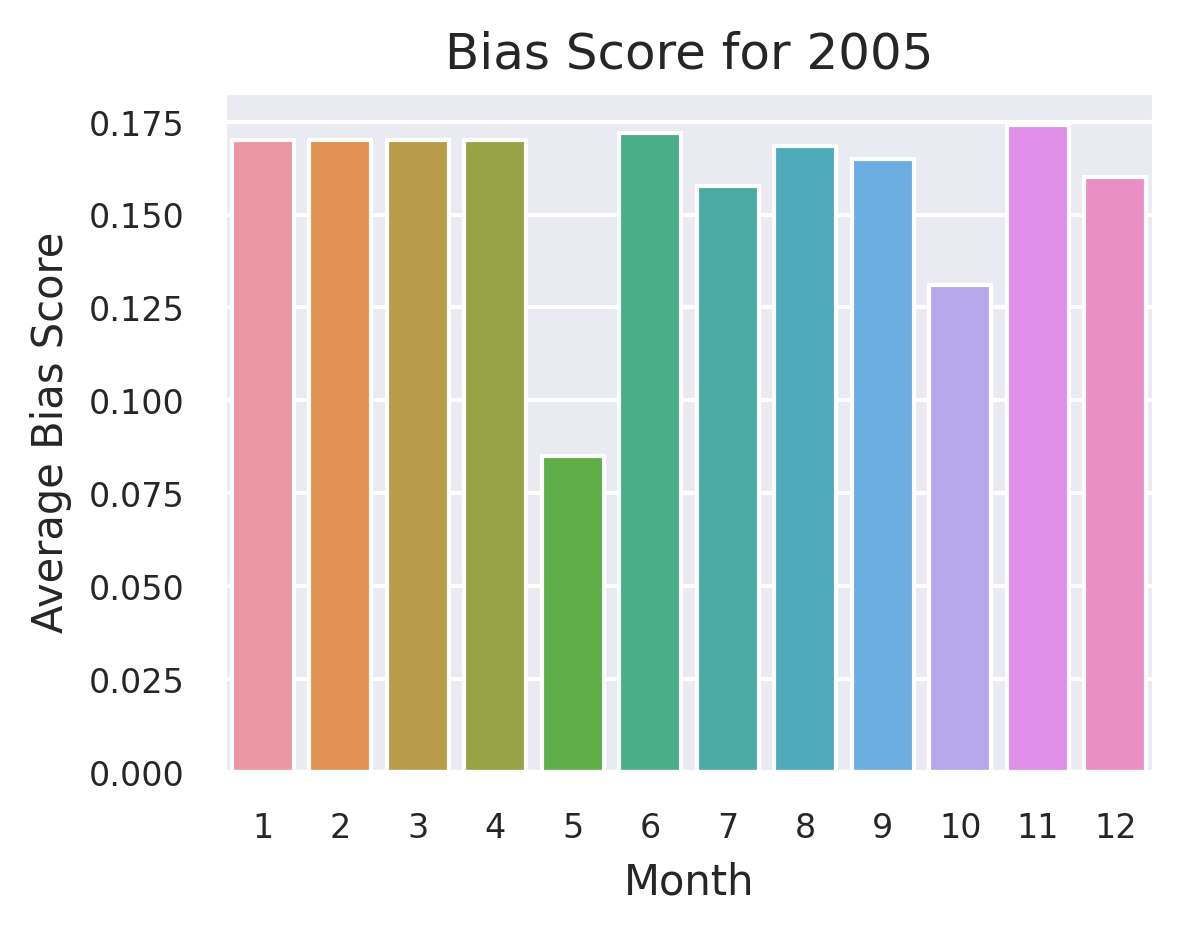

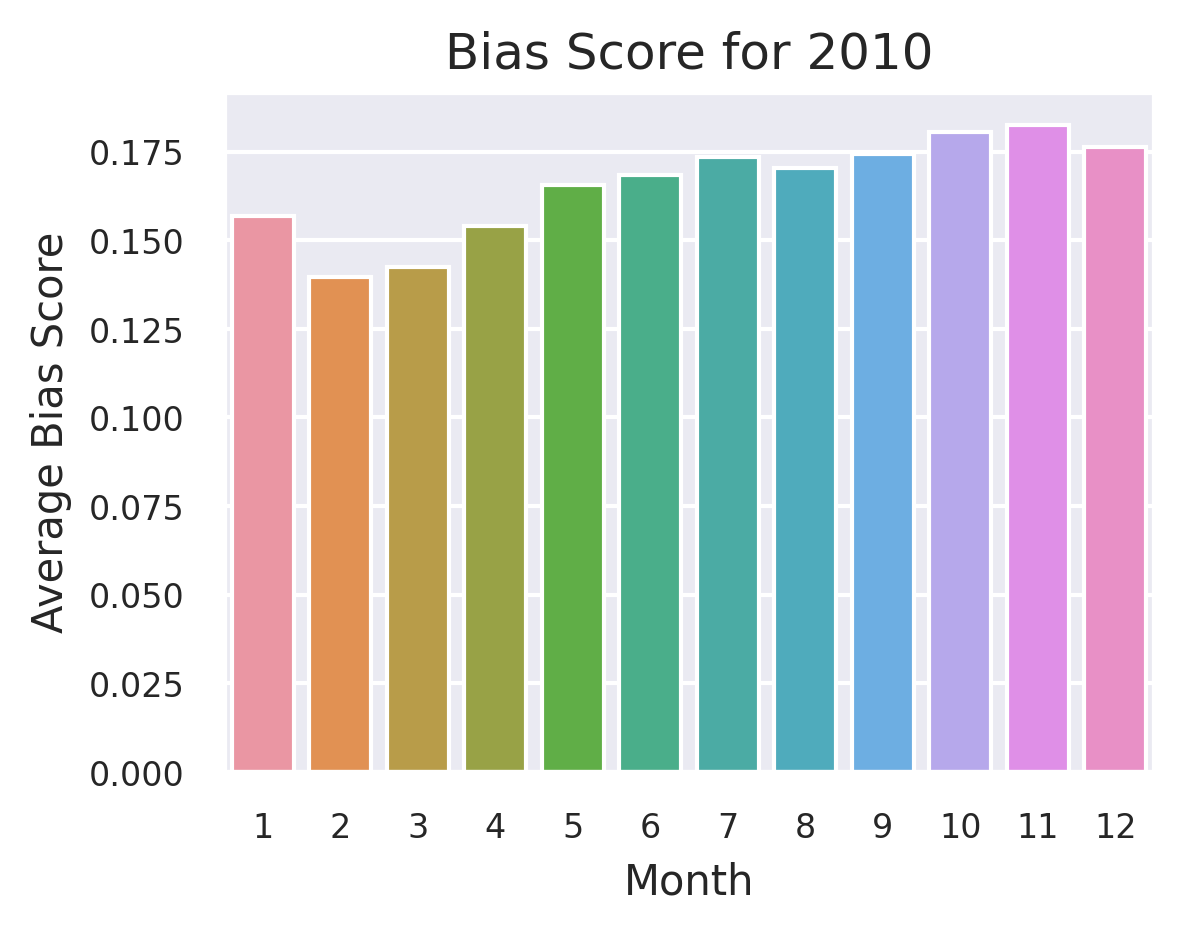

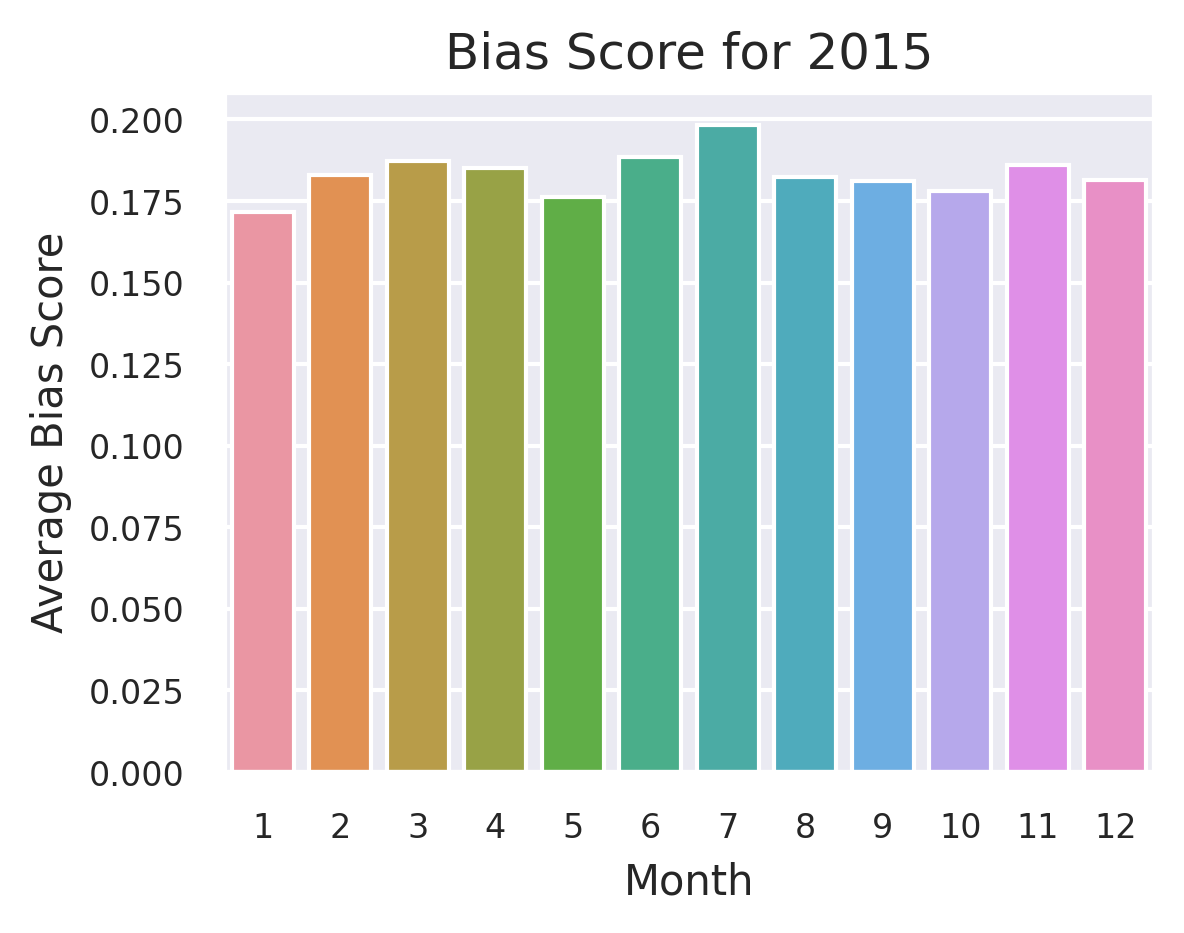

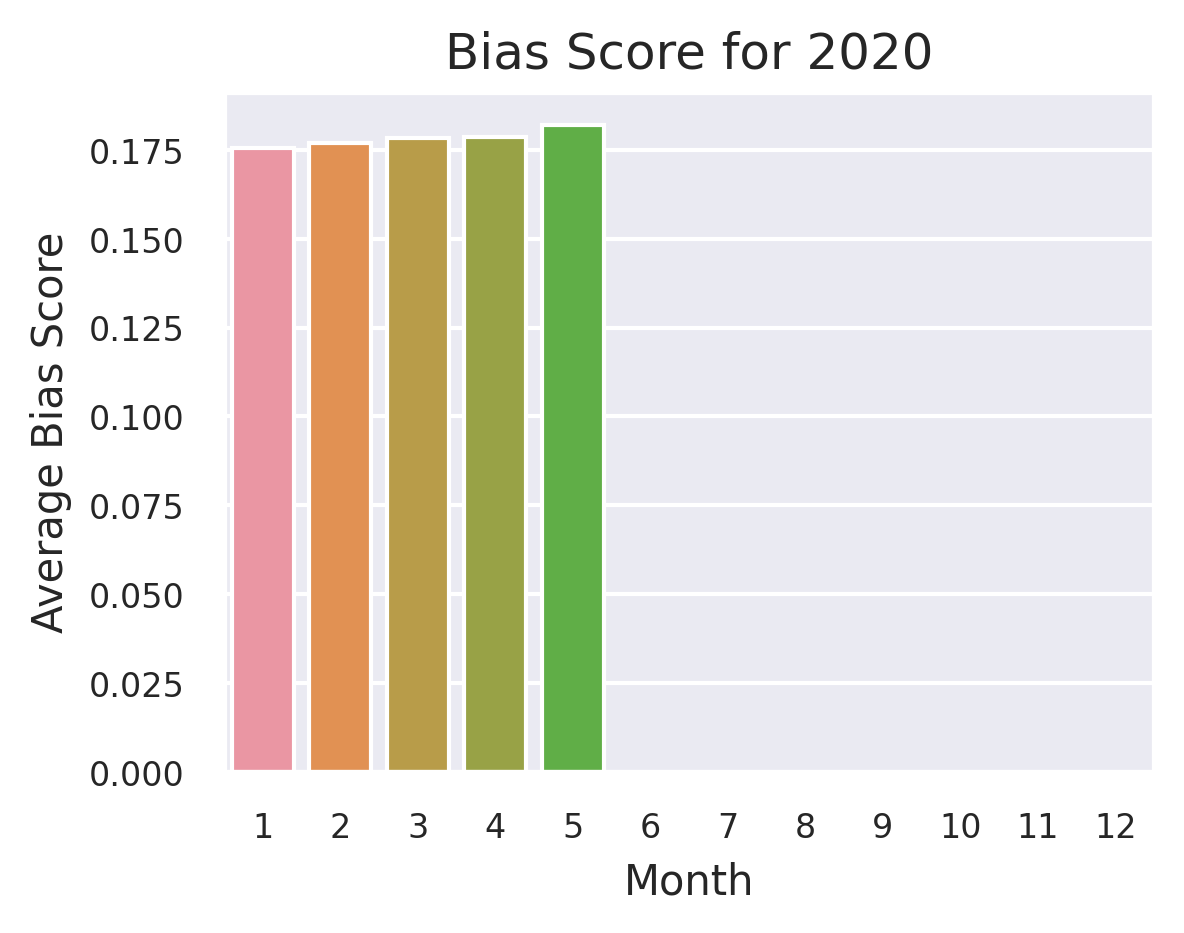

In [ ]:
year_subset_df2 = india_month_df[india_month_df.index.year.isin([2005, 2010, 2015, 2020])]
#year_subset_df.index = year_subset_df.index.strftime('%Y-%m')
year_subset_df2 = year_subset_df2.reset_index()
year_subset_df2['date'] = pd.to_datetime(year_subset_df2['date'])

for year in year_subset_df2['date'].dt.year.unique():
    plt.figure()
    year_df2 = year_subset_df[year_subset_df2['date'].dt.year == year]
    ax = sns.barplot(data=year_df2, x=year_subset_df2['date'].dt.month, y='Average Bias Score')
    ax.set_title(f'Bias Score for {year}')
    ax.set_xlabel('Month', fontsize=10)
    ax.set_ylabel('Average Bias Score', fontsize=10)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    plt.gcf().set_size_inches(4,3)


plt.show()

The trend here is interesting because in the 5 year period of time, India and USA almost have reverse Bias scores. In 2005 in the USA, almost half of the months in that year had an average Bias score of 0, which is indicating no bias or very trace amounts depending on the gendered language in the headline. In 2020 in India, this was also the same effect. All of the other year increments had fairly high Bias scores per month, around 0.175 for both India and US. In 2005 in May, India had a fairly low score compared to the rest. This may be due to the widespread coverage of the Delhi bomb blasts that occurred on May 13th, 2005 that killed more than 60 people and injured over 200.